In [18]:
!pip install twython

In [19]:
#Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [20]:
#Connect to Twitter
APP_KEY = "DcM7ZFZG8clbiVqfYDSaD"
APP_SECRET = "XhhCce7KV7wBrYWSqKVu2r74I9b3u2vrC9l3wf5"
twitter = Twython(APP_KEY, APP_SECRET)

In [21]:
#Getting timeline 
user_timeline=twitter.get_user_timeline(screen_name='bhaiyyaajee',count=1) 
#Getting most recent id
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='bhaiyyaajee',count=200, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [22]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [23]:
#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [24]:
#Filtering the relevant and significant words
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [25]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving farmer.png to farmer (1).png


In [26]:
mask = np.array(Image.open('farmer.png'))

In [27]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
text = ','.join(words)
wc.generate(text)


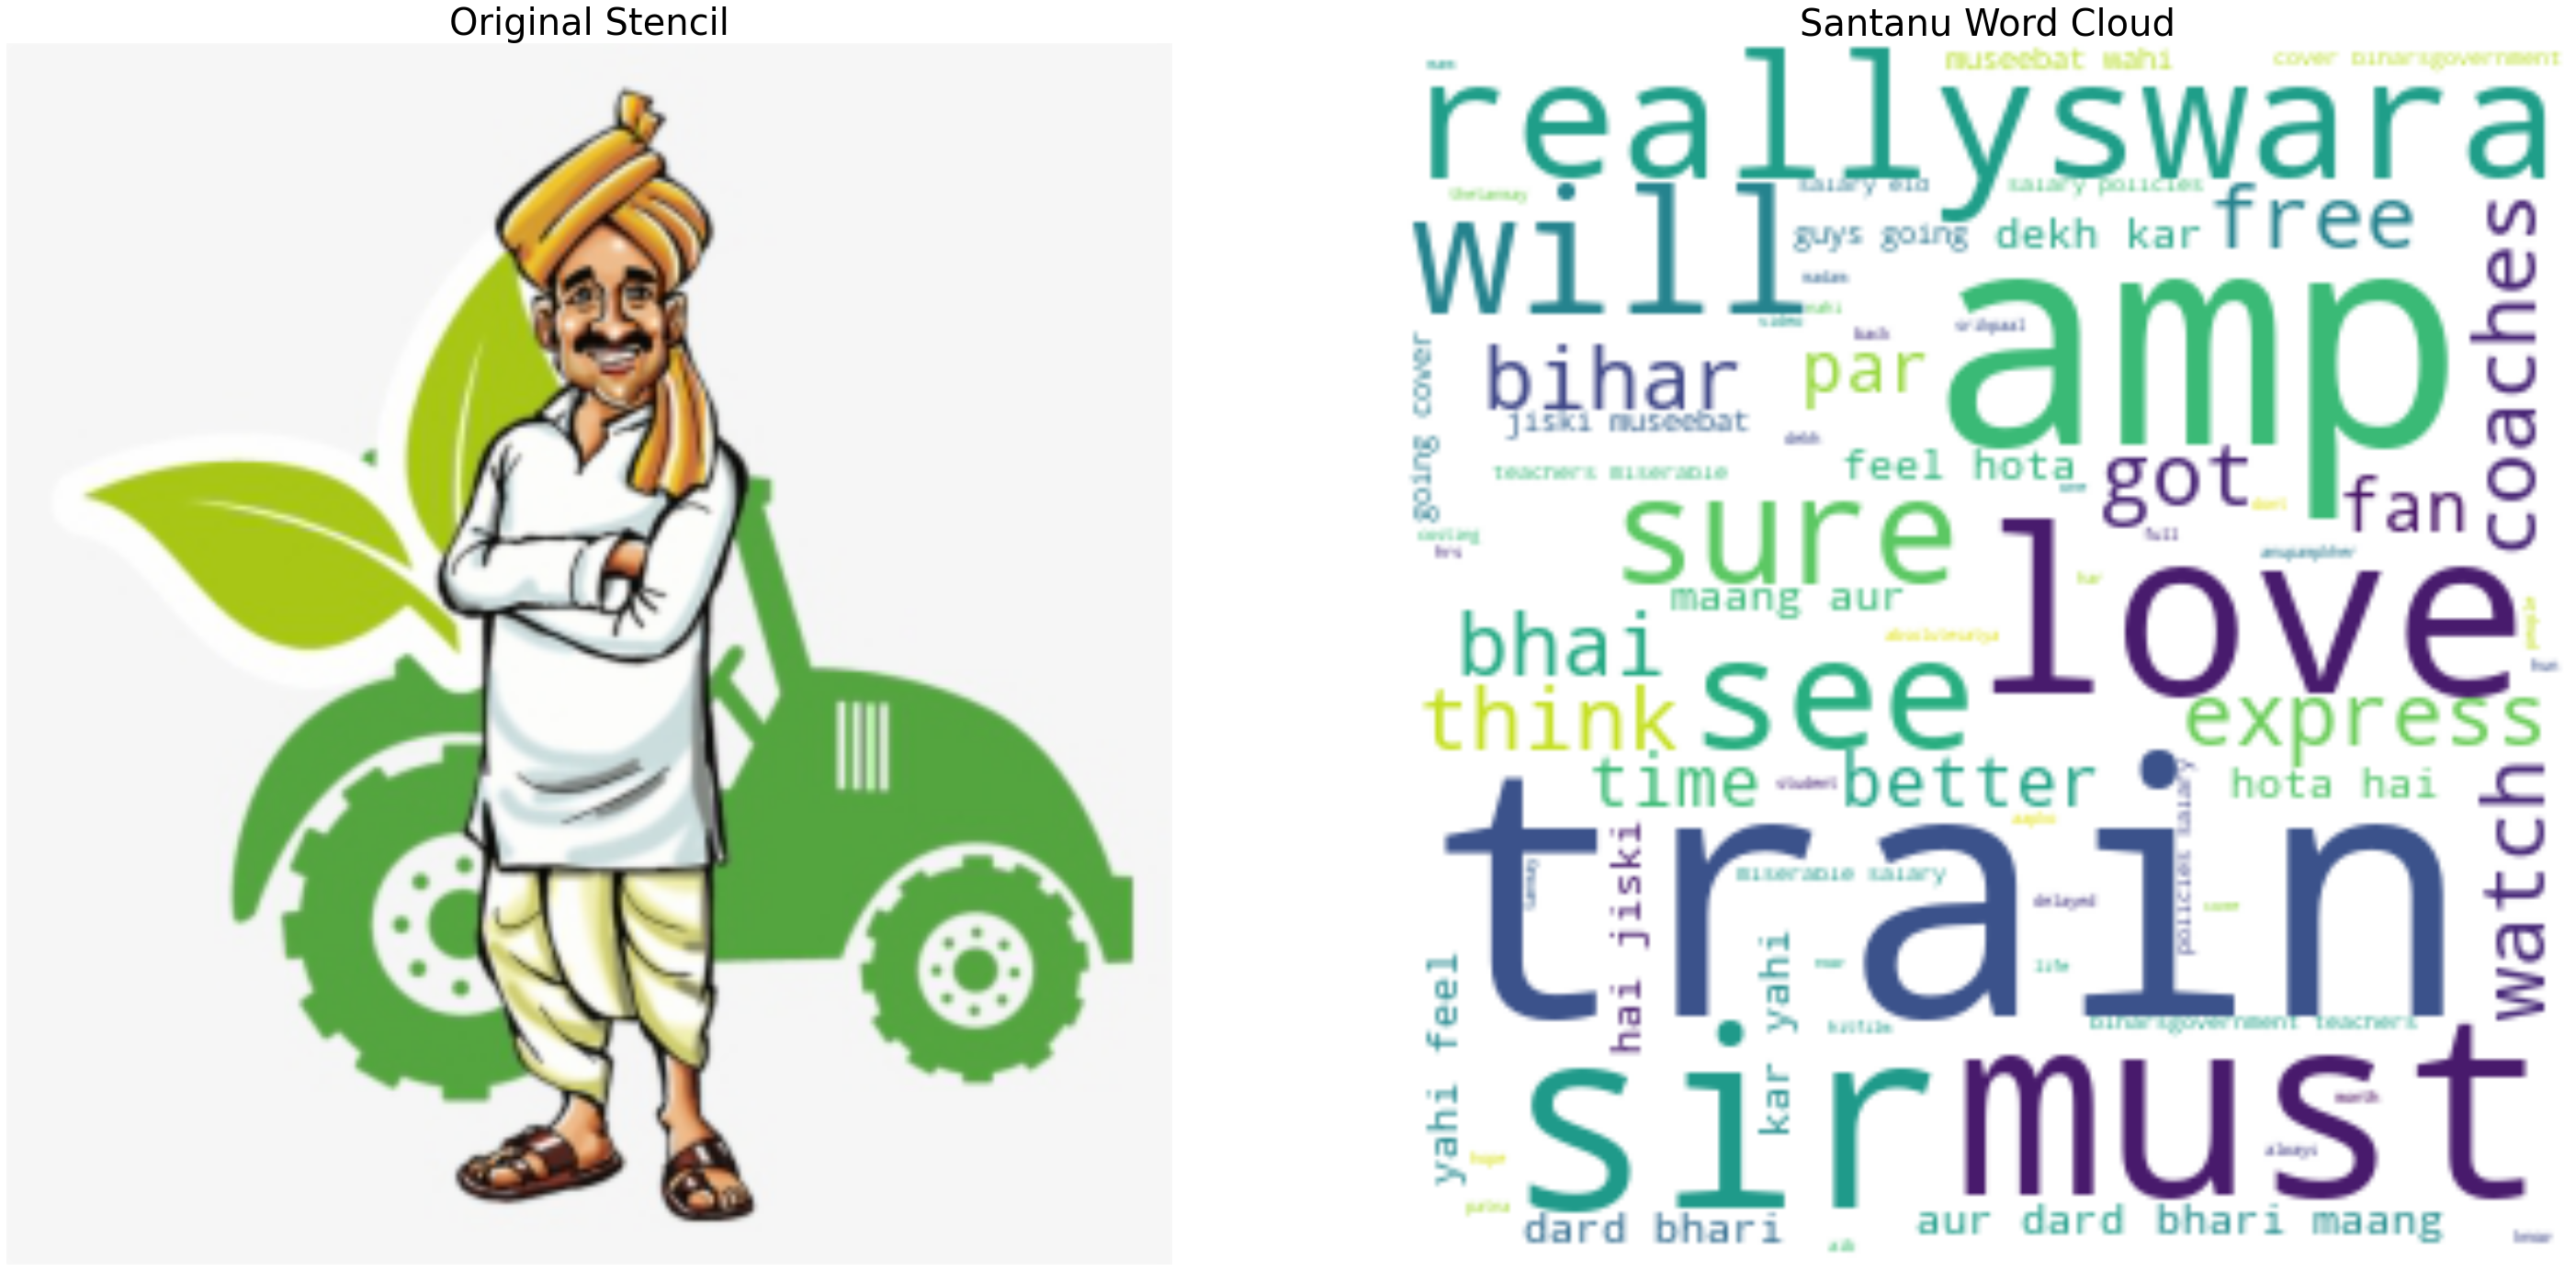

In [28]:
#Plotting the Wordcloud 
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Santanu Word Cloud', size=40)
plt.axis("off")
plt.show()
